# Kmeans - Aprendizagem Não-Supervisionada

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

## Filmes - Segmentação
Disponível em: https://www.kaggle.com/tmdb <br>
https://www.imdb.com/chart/top/?ref_=nv_mv_250

In [2]:
df = pd.read_csv("tmdb_5000_movies.csv")

#df.rename(columns={'budget': 'Custo', 'revenue': 'Receita'}, inplace=True)

df['Custo'] = df.budget
df['Receita'] = df.revenue

df.Custo = df.Custo.apply("{:,}".format)
df.Receita = df.Receita.apply("{:,}".format)

df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,Custo,Receita
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"237,000,000","2,787,965,087"
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"300,000,000","961,000,000"
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"245,000,000","880,674,609"
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"250,000,000","1,084,939,099"
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"260,000,000","284,139,100"


In [3]:
print("Número de filmes: ",len(df))

Número de filmes:  4803


In [4]:
len(df.columns)

22

In [5]:
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'Custo', 'Receita'],
      dtype='object')

### Cenário 1 - Filmes

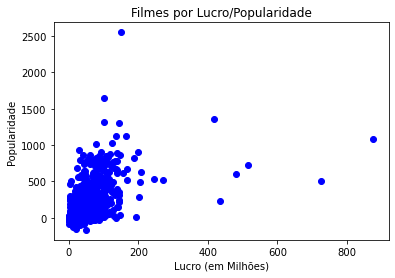

In [6]:
# budget - custo do filme
# revenue - receita do filme
df["lucro"] = (df.loc[:, "revenue"] - df.loc[:, "budget"])/1000000

plt.scatter( df.loc[:, "popularity"],  df.loc[:, "lucro"], 
             c="b")
plt.title("Filmes por Lucro/Popularidade")
plt.xlabel("Lucro (em Milhões)")
plt.ylabel("Popularidade")
plt.show()

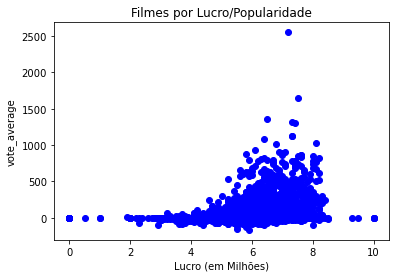

In [7]:
# budget - custo do filme
# revenue - receita do filme
df["lucro"] = (df.loc[:, "revenue"] - df.loc[:, "budget"])/1000000
plt.scatter( df.loc[:, "vote_average"],  df.loc[:, "lucro"], 
             c="b")
plt.title("Filmes por Lucro/Popularidade")
plt.xlabel("Lucro (em Milhões)")
plt.ylabel("vote_average")
plt.show()

In [8]:
# Clusterização
from sklearn.cluster import KMeans
X = df.loc[:, ["popularity", "lucro"]]
X.head()

,popularity,lucro
0,150.437577,2550.965087
1,139.082615,661.000000
2,107.376788,635.674609
3,112.312950,834.939099
4,43.926995,24.139100


In [9]:
cluster = y_pred = KMeans(n_clusters=3).fit_predict(X) 
df["cluster"] = cluster
df.loc[ :, ["popularity", "lucro", 'cluster']].head()

,popularity,lucro,cluster
0,150.437577,2550.965087,2
1,139.082615,661.000000,2
2,107.376788,635.674609,2
3,112.312950,834.939099,2
4,43.926995,24.139100,0


In [10]:
df.cluster.value_counts()

0    4098
1     593
2     112
Name: cluster, dtype: int64

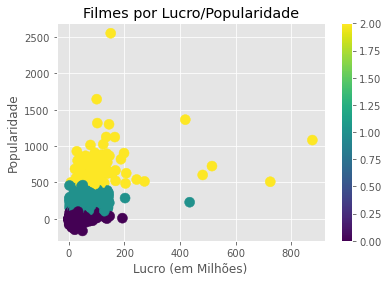

In [11]:
matplotlib.style.use("ggplot")

fig = plt.figure()
ax = fig.add_subplot(111)

scatter = ax.scatter( df.loc[:, "popularity"], df.loc[:, "lucro"], c=df["cluster"], s=100)
plt.title("Filmes por Lucro/Popularidade")
plt.xlabel("Lucro (em Milhões)")
plt.ylabel("Popularidade")
plt.colorbar(scatter)
ax.set_aspect('auto')

plt.show()

In [12]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,Custo,Receita,lucro,cluster
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"237,000,000","2,787,965,087",2550.965087,2
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"300,000,000","961,000,000",661.000000,2
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"245,000,000","880,674,609",635.674609,2
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"250,000,000","1,084,939,099",834.939099,2
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"260,000,000","284,139,100",24.139100,0


In [14]:
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'Custo', 'Receita', 'lucro', 'cluster'],
      dtype='object')

In [13]:
df[ df["cluster"] == 2].sort_values(by='lucro', ascending=False ) [:5]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,Custo,Receita,lucro,cluster
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"237,000,000","2,787,965,087",2550.965087,2
25,200000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",http://www.titanicmovie.com,597,"[{""id"": 2580, ""name"": ""shipwreck""}, {""id"": 298...",en,Titanic,"84 years later, a 101-year-old woman named Ros...",100.025899,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Nothing on Earth could come between them.,Titanic,7.5,7562,"200,000,000","1,845,034,188",1645.034188,2
28,150000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.jurassicworld.com/,135397,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 1718,...",en,Jurassic World,Twenty-two years after the events of Jurassic ...,418.708552,"[{""name"": ""Universal Studios"", ""id"": 13}, {""na...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The park is open.,Jurassic World,6.5,8662,"150,000,000","1,513,528,810",1363.528810,2
44,190000000,"[{""id"": 28, ""name"": ""Action""}]",http://www.furious7.com/,168259,"[{""id"": 830, ""name"": ""car race""}, {""id"": 3428,...",en,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...,102.322217,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Vengeance Hits Home,Furious 7,7.3,4176,"190,000,000","1,506,249,360",1316.249360,2
16,220000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",http://marvel.com/avengers_movie/,24428,"[{""id"": 242, ""name"": ""new york""}, {""id"": 5539,...",en,The Avengers,When an unexpected enemy emerges and threatens...,144.448633,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Some assembly required.,The Avengers,7.4,11776,"220,000,000","1,519,557,910",1299.557910,2


In [15]:
df['release_date'].head()

0    2009-12-10
1    2007-05-19
2    2015-10-26
3    2012-07-16
4    2012-03-07
Name: release_date, dtype: object

In [20]:
df[ (df["cluster"] == 2) & (df['release_date'] >= '2015-01-01') ].sort_values(by='lucro', ascending=False ) [:5]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,Custo,Receita,lucro,cluster
28,150000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.jurassicworld.com/,135397,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 1718,...",en,Jurassic World,Twenty-two years after the events of Jurassic ...,418.708552,"[{""name"": ""Universal Studios"", ""id"": 13}, {""na...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The park is open.,Jurassic World,6.5,8662,"150,000,000","1,513,528,810",1363.528810,2
44,190000000,"[{""id"": 28, ""name"": ""Action""}]",http://www.furious7.com/,168259,"[{""id"": 830, ""name"": ""car race""}, {""id"": 3428,...",en,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...,102.322217,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Vengeance Hits Home,Furious 7,7.3,4176,"190,000,000","1,506,249,360",1316.249360,2
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/movie/193/avengers_ag...,99861,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Age Has Come.,Avengers: Age of Ultron,7.3,6767,"280,000,000","1,405,403,694",1125.403694,2
546,74000000,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 16, ""...",http://www.minionsmovie.com/,211672,"[{""id"": 3487, ""name"": ""assistant""}, {""id"": 179...",en,Minions,"Minions Stuart, Kevin and Bob are recruited by...",875.581305,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Before Gru, they had a history of bad bosses",Minions,6.4,4571,"74,000,000","1,156,730,962",1082.730962,2
26,250000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",http://marvel.com/captainamericapremiere,271110,"[{""id"": 393, ""name"": ""civil war""}, {""id"": 6091...",en,Captain America: Civil War,"Following the events of Age of Ultron, the col...",198.372395,"[{""name"": ""Studio Babelsberg"", ""id"": 264}, {""n...",...,"[{""iso_639_1"": ""ro"", ""name"": ""Rom\u00e2n\u0103...",Released,Divided We Fall,Captain America: Civil War,7.1,7241,"250,000,000","1,153,304,495",903.304495,2


In [21]:
df[ df["cluster"] == 0].sort_values(by='lucro', ascending=False ) [:10]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,Custo,Receita,lucro,cluster
2116,20000000,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 16, ""...",NaN,14873,"[{""id"": 1261, ""name"": ""river""}, {""id"": 4344, ""...",en,The Jungle Book 2,"Mowgli, missing the jungle and his old friends...",19.819893,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Feel the jungle beat,The Jungle Book 2,5.6,269,"20,000,000","135,680,000",115.680000,0
3446,6000000,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,1777,"[{""id"": 840, ""name"": ""usa president""}, {""id"": ...",en,Fahrenheit 9/11,Michael Moore's view on what happened to the U...,16.209850,"[{""name"": ""BIM Distribuzione"", ""id"": 225}, {""n...",...,"[{""iso_639_1"": ""ar"", ""name"": ""\u0627\u0644\u06...",Released,Controversy... what controversy?,Fahrenheit 9/11,6.8,397,"6,000,000","119,114,517",113.114517,0
1363,35000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 35, ""nam...",NaN,10054,"[{""id"": 848, ""name"": ""double life""}, {""id"": 97...",en,Spy Kids,Carmen and Juni think their parents are boring...,21.543389,"[{""name"": ""Dimension Films"", ""id"": 7405}, {""na...",...,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}, ...",Released,Real spies...only smaller,Spy Kids,5.5,867,"35,000,000","147,934,180",112.934180,0
2090,20000000,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,10678,"[{""id"": 378, ""name"": ""prison""}, {""id"": 1594, ""...",en,Bringing Down the House,"Straight-laced lawyer, Peter Sanderson (Steve ...",8.351385,"[{""name"": ""Hyde Park Films"", ""id"": 1172}, {""na...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,"Everything he needed to know about life, she l...",Bringing Down the House,5.4,183,"20,000,000","132,675,402",112.675402,0
399,85000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 16, ""...",http://www.sonypictures.com/movies/openseason/,7484,"[{""id"": 414, ""name"": ""hunter""}, {""id"": 1262, ""...",en,Open Season,"Boog, a domesticated 900lb. Grizzly bear finds...",26.619510,"[{""name"": ""Sony Pictures Animation"", ""id"": 2251}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,One Fur All & All Fur One,Open Season,6.1,656,"85,000,000","197,309,027",112.309027,0
1156,40000000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 18, ""name...",NaN,1645,"[{""id"": 529, ""name"": ""ku klux klan""}, {""id"": 5...",en,A Time to Kill,A young lawyer defends a black man accused of ...,25.219805,"[{""name"": ""Regency Enterprises"", ""id"": 508}, {...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Experience a time you'll never forget.,A Time to Kill,7.0,509,"40,000,000","152,266,007",112.266007,0
2330,17000000,"[{""id"": 35, ""name"": ""Comedy""}]",http://www.meangirls.com/,10625,"[{""id"": 5248, ""name"": ""female friendship""}, {""...",en,Mean Girls,"Cady Heron is a hit with The Plastics, the A-l...",36.423717,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,"[{""iso_639_1"": ""sw"", ""name"": ""Kiswahili""}, {""i...",Released,Welcome to girl world.,Mean Girls,6.9,2320,"17,000,000","129,042,871",112.042871,0
296,100000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 14, ""nam...",http://www.end-of-days.com/,9946,"[{""id"": 186, ""name"": ""christianity""}, {""id"": 5...",en,End of Days,"On December 28th, 1999, the citizens of New Yo...",20.652943,"[{""name"": ""Beacon Communications"", ""id"": 919}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Prepare for the end.,End of Days,5.5,482,"100,000,000","211,989,043",111.989043,0
704,60000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 16, ""...",NaN,8916,"[{""id"": 1402, ""name"": ""general""}, {""id"": 1701,...",en,Antz,"In this animated hit, a neurotic worker ant in...",41.515702,"

In [22]:
df[ df["cluster"] == 1].sort_values(by='lucro', ascending=False ) [:10]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,Custo,Receita,lucro,cluster
243,110000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,1593,"[{""id"": 2598, ""name"": ""museum""}, {""id"": 4062, ...",en,Night at the Museum,Chaos reigns at the natural history museum whe...,48.780039,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Where History Comes To Life,Night at the Museum,6.3,2862,"110,000,000","574,480,841",464.480841,1
2809,7000000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 53, ""nam...",http://www.jaws25.com/,578,"[{""id"": 1495, ""name"": ""fishing""}, {""id"": 1913,...",en,Jaws,An insatiable great white shark terrorizes the...,50.152327,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Don't go in the water.,Jaws,7.5,2542,"7,000,000","470,654,000",463.654000,1
185,132000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 53, ""...",NaN,74,"[{""id"": 447, ""name"": ""post traumatic stress d...",en,War of the Worlds,Ray Ferrier is a divorced dockworker and less-...,48.572726,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They're already here.,War of the Worlds,6.2,2322,"132,000,000","591,739,379",459.739379,1
2511,18000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10751, ""...",https://www.foxconnect.com/home-alone-4.html,771,"[{""id"": 65, ""name"": ""holiday""}, {""id"": 1437, ""...",en,Home Alone,Eight-year-old Kevin McCallister makes the mos...,2.186927,"[{""name"": ""Twentieth Century Fox Film Corporat...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A Family Comedy Without the Family.,Home Alone,7.1,2414,"18,000,000","476,684,675",458.684675,1
509,75000000,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 16, ""...",NaN,953,"[{""id"": 2043, ""name"": ""lion""}, {""id"": 2509, ""n...",en,Madagascar,Zoo animals leave the comforts of man-made hab...,48.110909,"[{""name"": ""DreamWorks SKG"", ""id"": 27}, {""name""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Someone's got a zoo loose.,Madagascar,6.6,3237,"75,000,000","532,680,671",457.680671,1
120,150000000,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 16, ""...",http://www.madagascar-themovie.com,10527,"[{""id"": 409, ""name"": ""africa""}, {""id"": 931, ""n...",en,Madagascar: Escape 2 Africa,"Alex, Marty, Melman, Gloria, King Julien, Maur...",44.141021,"[{""name"": ""DreamWorks Animation"", ""id"": 521}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Still together. Still lost!,Madagascar: Escape 2 Africa,6.2,1810,"150,000,000","603,900,354",453.900354,1
254,110000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://www.smurfhappens.com/,41513,"[{""id"": 305, ""name"": ""moon""}, {""id"": 2343, ""na...",en,The Smurfs,When the evil wizard Gargamel chases the tiny ...,36.654220,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Smurf Happens.,The Smurfs,5.5,1179,"110,000,000","563,749,323",453.749323,1
558,75000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 35, ""...",http://www.simpsonsmovie.com/,35,"[{""id"": 494, ""name"": ""father son relationship""...",en,The Simpsons Movie,After Homer accidentally pollutes the town's w...,46.875375,"[{""name"": ""Gracie Films"", ""id"": 18}, {""name"": ...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,See our family. And feel better about yours.,The Simpsons Movie,6.9,2264,"75,000,000","527,068,851",452.068851,1
234,135000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 16, ""...",http://www.thecroodsmovie.com/,49519,"[{""id"": 4428, ""name""

In [24]:
def plot_cluster(df, centroids, xdata_name, ydata_name, title, xlabel, ylabel):

    # Set style of scatterplot
    sns.set_context("notebook", font_scale=1.1)
    sns.set_style("ticks")
    
    # Create scatterplot of dataframe
    sns.lmplot(xdata_name, # Horizontal axis
               ydata_name, # Vertical axis
               data=df, # Data source
               fit_reg=False, # Don't fix a regression line
               hue="cluster")
    
    plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', 
            linewidths=3,
            color='k',)

    
    # Set title
    plt.title(title)
    # Set x-axis label
    plt.xlabel(xlabel)
    # Set y-axis label
    plt.ylabel(ylabel)
    plt.show()

/home/valencar/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


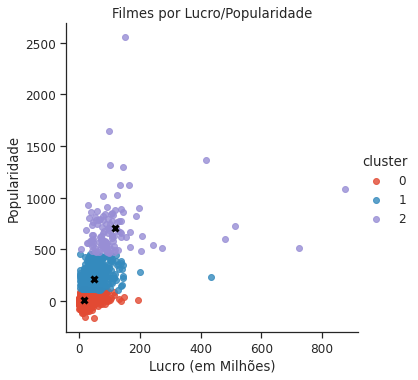

In [25]:
n_clusters = 3
kmeans = KMeans(n_clusters).fit(X)
ypred = KMeans(n_clusters).fit_predict(X)
df["cluster"] = y_pred
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plot_cluster(df, centroids, "popularity", "lucro", title = "Filmes por Lucro/Popularidade", 
             xlabel =  "Lucro (em Milhões)", ylabel = "Popularidade" )

In [26]:
kmeans.cluster_centers_

array([[ 14.93158445,  11.77645564],
       [117.98346025, 710.10636795],
       [ 48.95085111, 217.60142042]])

In [28]:
# budget - custo do filme
# revenue - receita do filme
df2 = df[ df["cluster"] == 2].sort_values(by='lucro', ascending=False ) [:20]
df2[["title","popularity",'revenue', "lucro", "cluster"]].head(20)

,title,popularity,revenue,lucro,cluster
0,Avatar,150.437577,2787965087,2550.965087,2
25,Titanic,100.025899,1845034188,1645.034188,2
28,Jurassic World,418.708552,1513528810,1363.528810,2
44,Furious 7,102.322217,1506249360,1316.249360,2
16,The Avengers,144.448633,1519557910,1299.557910,2
7,Avengers: Age of Ultron,134.279229,1405403694,1125.403694,2
124,Frozen,165.125366,1274219009,1124.219009,2
546,Minions,875.581305,1156730962,1082.730962,2
329,The Lord of the Rings: The Return of the King,123.630332,1118888979,1024.888979,2
31,Iron Man 3,77.682080,1215439994,1015.439994,2


In [29]:
df2 = df[ df["cluster"] == 2].sort_values(by='lucro', ascending=True) [:20]
df2[["title","popularity",'revenue', "lucro", "cluster"]].head(20)

,title,popularity,revenue,lucro,cluster
160,How to Train Your Dragon 2,100.213910,609123048,464.123048,2
118,Ratatouille,65.677399,623722818,473.722818,2
115,Hancock,56.758411,624029371,474.029371,2
614,Despicable Me,113.858273,543513985,474.513985,2
126,Thor: The Dark World,99.499595,644571402,474.571402,2
1695,Aladdin,92.982009,504050219,476.050219,2
2017,Ghost,41.967005,505000000,483.000000,2
790,American Sniper,87.534370,542307423,483.507423,2
88,Big Hero 6,203.734590,652105443,487.105443,2
216,Life of Pi,51.328145,609016565,489.016565,2


In [30]:
pd.options.display.float_format = '{:,.0f}'.format
df.loc[:,["homepage","popularity","lucro", "cluster"]].head()

,homepage,popularity,lucro,cluster
0,http://www.avatarmovie.com/,150,"2,551",2
1,http://disney.go.com/disneypictures/pirates/,139,661,2
2,http://www.sonypictures.com/movies/spectre/,107,636,2
3,http://www.thedarkknightrises.com/,112,835,2
4,http://movies.disney.com/john-carter,44,24,0


/home/valencar/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


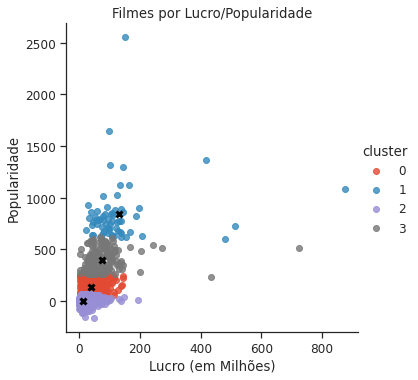

In [31]:
n_clusters = 4
kmeans = KMeans(n_clusters).fit(X)
y_pred = KMeans(n_clusters=4).fit_predict(X)


df["cluster"] = y_pred


# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plot_cluster(df, centroids, "popularity", "lucro", title = "Filmes por Lucro/Popularidade", 
             xlabel =  "Lucro (em Milhões)", ylabel = "Popularidade" )

/home/valencar/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


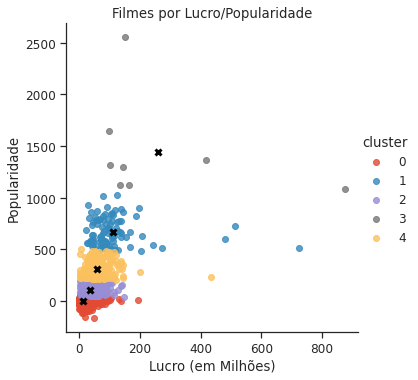

In [32]:
n_clusters = 5
kmeans = KMeans(n_clusters).fit(X)
y_pred = KMeans(n_clusters).fit_predict(X)
df["cluster"] = y_pred
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plot_cluster(df, centroids, "popularity", "lucro", title = "Filmes por Lucro/Popularidade", 
             xlabel =  "Lucro (em Milhões)", ylabel = "Popularidade" )

In [33]:
# budget - custo do filme
# revenue - receita do filme
df2 = df[ df["cluster"] == 3].sort_values(by='lucro', ascending=False ) [:20]
df2[["title","popularity",'revenue', "lucro", "cluster"]].head(15)

,title,popularity,revenue,lucro,cluster
0,Avatar,150,2787965087,"2,551",3
25,Titanic,100,1845034188,"1,645",3
28,Jurassic World,419,1513528810,"1,364",3
44,Furious 7,102,1506249360,"1,316",3
16,The Avengers,144,1519557910,"1,300",3
7,Avengers: Age of Ultron,134,1405403694,"1,125",3
124,Frozen,165,1274219009,"1,124",3
546,Minions,876,1156730962,"1,083",3


In [34]:
#df2 = df[ df["title"].apply(lambda x: x is 'furious') ].sort_values(by='revenue', ascending=False ) [:20]
df2[["title","popularity",'revenue', "lucro", "cluster"]].head(10)

,title,popularity,revenue,lucro,cluster
0,Avatar,150,2787965087,"2,551",3
25,Titanic,100,1845034188,"1,645",3
28,Jurassic World,419,1513528810,"1,364",3
44,Furious 7,102,1506249360,"1,316",3
16,The Avengers,144,1519557910,"1,300",3
7,Avengers: Age of Ultron,134,1405403694,"1,125",3
124,Frozen,165,1274219009,"1,124",3
546,Minions,876,1156730962,"1,083",3


In [35]:
df[df['title'].str.contains('Titanic')]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,Custo,Receita,lucro,cluster
25,200000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",http://www.titanicmovie.com,597,"[{""id"": 2580, ""name"": ""shipwreck""}, {""id"": 298...",en,Titanic,"84 years later, a 101-year-old woman named Ros...",100,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Nothing on Earth could come between them.,Titanic,8,7562,"200,000,000","1,845,034,188","1,645",3
1269,0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 18, ""nam...",NaN,24575,[],en,Raise the Titanic,"To obtain a supply of a rare mineral, a ship r...",2,"[{""name"": ""ITC Entertainment"", ""id"": 1584}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They've found the Titanic. There's just one th...,Raise the Titanic,5,21,0,0,0,0
3103,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,115872,[],en,La femme de chambre du Titanic,"Horty, a French foundry worker, wins a contest...",1,[],...,"[{""iso_639_1"": ""hu"", ""name"": ""Magyar""}, {""iso_...",Released,NaN,The Chambermaid on the Titanic,5,3,0,0,0,0


In [36]:
df[df['title'].str.contains('Superman')]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,Custo,Receita,lucro,cluster
9,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.batmanvsupermandawnofjustice.com/,209112,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 7002...",en,Batman v Superman: Dawn of Justice,Fearing the actions of a god-like Super Hero l...,156,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""A...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Justice or revenge,Batman v Superman: Dawn of Justice,6,7004,"250,000,000","873,260,194",623,1
10,270000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://www.superman.com,1452,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Superman Returns,Superman returns to discover his 5-year absenc...,58,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,NaN,Superman Returns,5,1400,"270,000,000","391,081,192",121,2
813,55000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,1924,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Superman,Mild-mannered Clark Kent works as a reporter a...,49,"[{""name"": ""Warner Bros."", ""id"": 6194}, {""name""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,You'll Believe a Man Can Fly!,Superman,7,1022,"55,000,000","300,218,018",245,4
870,54000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,8536,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Superman II,Three escaped criminals from the planet Krypto...,31,"[{""name"": ""Warner Bros."", ""id"": 6194}, {""name""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Man of Steel meets his match!,Superman II,6,629,"54,000,000","190,458,706",136,2
1296,39000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 28, ""nam...",NaN,9531,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Superman III,"Aiming to defeat the Man of Steel, wealthy exe...",22,"[{""name"": ""Warner Bros."", ""id"": 6194}, {""name""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,If the world's most powerful computer can cont...,Superman III,5,490,"39,000,000","75,850,624",37,0
2433,17000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,11411,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Superman IV: The Quest for Peace,With global superpowers engaged in an increasi...,17,"[{""name"": ""Cannon Films"", ""id"": 4110}, {""name""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,"Nuclear Power. In the best hands, it is danger...",Superman IV: The Quest for Peace,4,318,"17,000,000","19,300,000",2,0


In [37]:
df[df['title'].str.contains('Woman')]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,Custo,Receita,lucro,cluster
1185,40000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,193610,"[{""id"": 1326, ""name"": ""infidelity""}, {""id"": 97...",en,The Other Woman,"After discovering her boyfriend is married, Ca...",35,"[{""name"": ""Twentieth Century Fox Film Corporat...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The oddest friends are about to get even,The Other Woman,6,1437,"40,000,000","196,781,193",157,2
2533,17000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 27, ""name...",http://womaninblack.com/,65086,"[{""id"": 212, ""name"": ""london england""}, {""id"":...",en,The Woman in Black,"The story follows a young lawyer, Arthur Kipps...",44,"[{""name"": ""Hammer Film Productions"", ""id"": 131...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,What did they see?,The Woman in Black,6,1206,"17,000,000","127,730,736",111,2
2668,14000000,"[{""id"": 10749, ""name"": ""Romance""}, {""id"": 35, ...",NaN,114,"[{""id"": 549, ""name"": ""prostitute""}, {""id"": 592...",en,Pretty Woman,When millionaire wheeler-dealer Edward Lewis e...,45,"[{""name"": ""Touchstone Pictures"", ""id"": 9195}, ...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Who knew it was so much fun to be a hooker?,Pretty Woman,7,1746,"14,000,000","463,000,000",449,4
2896,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",NaN,44555,[],zh,三枪拍案惊奇,"Wang is a gloomy, cunning and avaricious noodl...",1,"[{""name"": ""Beijing New Picture Film Co. Ltd."",...",...,"[{""iso_639_1"": ""zh"", ""name"": ""\u666e\u901a\u8b...",Released,NaN,"A Woman, a Gun and a Noodle Shop",5,13,0,0,0,0
2942,11000000,"[{""id"": 18, ""name"": ""Drama""}]",http://womaningoldmovie.com/,304357,"[{""id"": 2652, ""name"": ""nazis""}, {""id"": 9672, ""...",en,Woman in Gold,"Maria Altmann, an octogenarian Jewish refugee,...",21,"[{""name"": ""BBC Films"", ""id"": 288}, {""name"": ""O...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Justice is priceless.,Woman in Gold,7,440,"11,000,000","61,619,773",51,0
3269,8000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",NaN,14629,"[{""id"": 187056, ""name"": ""woman director""}]",en,Woman on Top,"Set to the intoxicating rhythms of Brazil, ""Wo...",4,"[{""name"": ""Fox Searchlight Pictures"", ""id"": 43}]",...,"[{""iso_639_1"": ""pt"", ""name"": ""Portugu\u00eas""}...",Released,Want to know how she got there?,Woman on Top,6,46,"8,000,000",0,-8,0
3528,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",NaN,16186,[],en,Diary of a Mad Black Woman,Charles McCarter and his wife Helen are about ...,4,"[{""name"": ""Lions Gate Films"", ""id"": 35}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Time heals the heart. Faith heals the rest.,Diary of a Mad Black Woman,6,71,0,0,0,0
3921,3000000,"[{""id"": 18, ""name"": ""Drama""}]",NaN,44634,"[{""id"": 10183, ""name"": ""independent film""}]",en,Woman Thou Art Loosed,An adaptation of Bishop T.D. Jakes' self-help ...,0,[],...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Woman Thou Art Loosed,5,3,"3,000,000","6,804,016",4,0
4694,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,288927,"[{""id"": 187056, ""name"": ""woman director""}]",en,Archaeology of a Woman,A woman's dementia uncovers secrets of a 30-ye...,0,[],...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Archaeology of a Woman,0,0,0,0,0,0
4705,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,28666,"[{""id"": 155700, ""name"": ""charles willeford""}, ...",en,The Woman Chaser,A 1950s used-car salesman (Patrick Warburton) ...,1,[],...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,The Woman Chaser,5,4,0,0,0,0


In [38]:
y_pred[:5]

array([3, 1, 1, 1, 0], dtype=int32)

In [39]:
df.cluster.value_counts()

0    3591
2     850
4     260
1      94
3       8
Name: cluster, dtype: int64

In [40]:
df.loc[:,["homepage","popularity","lucro", "cluster"]].head()

,homepage,popularity,lucro,cluster
0,http://www.avatarmovie.com/,150,"2,551",3
1,http://disney.go.com/disneypictures/pirates/,139,661,1
2,http://www.sonypictures.com/movies/spectre/,107,636,1
3,http://www.thedarkknightrises.com/,112,835,1
4,http://movies.disney.com/john-carter,44,24,0


In [41]:
# James Cameron lucra US$ 350 milhões com 'Avatar ... 
# Arrecadou US$ 97 milhões com "Titanic"
df.loc[:,["homepage","popularity","lucro", "cluster"]].sort_values(by="lucro", ascending=False).head(15)

,homepage,popularity,lucro,cluster
0,http://www.avatarmovie.com/,150,"2,551",3
25,http://www.titanicmovie.com,100,"1,645",3
28,http://www.jurassicworld.com/,419,"1,364",3
44,http://www.furious7.com/,102,"1,316",3
16,http://marvel.com/avengers_movie/,144,"1,300",3
7,http://marvel.com/movies/movie/193/avengers_ag...,134,"1,125",3
124,http://movies.disney.com/frozen,165,"1,124",3
546,http://www.minionsmovie.com/,876,"1,083",3
329,http://www.lordoftherings.net,124,"1,025",1
31,http://marvel.com/ironman3,78,"1,015",1


### Predição de novos dados

In [44]:
n_clusters = 6
n_clusters

6

In [45]:
y_pred = KMeans(n_clusters, random_state=0).fit(X)
df["cluster"] = y_pred.labels_
df.loc[:,["homepage","popularity","lucro", "cluster"]].head()

,homepage,popularity,lucro,cluster
0,http://www.avatarmovie.com/,150,"2,551",3
1,http://disney.go.com/disneypictures/pirates/,139,661,1
2,http://www.sonypictures.com/movies/spectre/,107,636,1
3,http://www.thedarkknightrises.com/,112,835,1
4,http://movies.disney.com/john-carter,44,24,0


In [46]:
y_pred = KMeans(n_clusters, random_state=0).fit_predict(X)
df.loc[:,["homepage","popularity","lucro", "cluster"]].head()

,homepage,popularity,lucro,cluster
0,http://www.avatarmovie.com/,150,"2,551",3
1,http://disney.go.com/disneypictures/pirates/,139,661,1
2,http://www.sonypictures.com/movies/spectre/,107,636,1
3,http://www.thedarkknightrises.com/,112,835,1
4,http://movies.disney.com/john-carter,44,24,0


In [47]:
X.head()

,popularity,lucro
0,150,"2,551"
1,139,661
2,107,636
3,112,835
4,44,24


In [48]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

popularity = 150.437577
lucro = 2550.965087
kmeans.predict([[popularity, lucro], [130, 500], [43,24]])

array([1, 1, 0], dtype=int32)

In [49]:
def plot_new_data_cluster(df, x_new, y_new, centroids, xdata_name, ydata_name, title, xlabel, ylabel):

    # Set style of scatterplot
    sns.set_context("notebook", font_scale=1.1)
    sns.set_style("ticks")
    
    # Create scatterplot of dataframe
    sns.lmplot(xdata_name, # Horizontal axis
               ydata_name, # Vertical axis
               data=df, # Data source
               fit_reg=False, # Don't fix a regression line
               hue="cluster")
    
    plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', 
            linewidths=3,
            color='k',)

    
    plt.scatter(x_new, y_new, c='red', marker='x', s=100)
    
    # Set title
    plt.title(title)
    # Set x-axis label
    plt.xlabel(xlabel)
    # Set y-axis label
    plt.ylabel(ylabel)
    plt.show()

/home/valencar/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


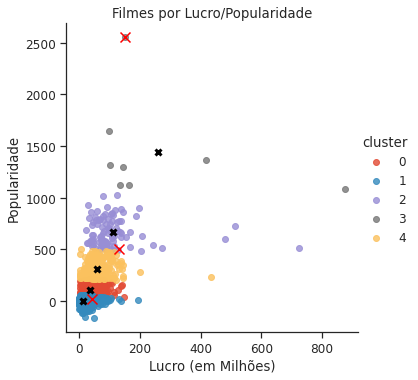

In [50]:
n_clusters = 5
kmeans = KMeans(n_clusters).fit(X)
y_pred = KMeans(n_clusters).fit_predict(X)
df["cluster"] = y_pred

centroids = kmeans.cluster_centers_

# os novos dados
popularity = 150.437577
lucro = 2550.965087
dados_x = [[popularity, lucro], [130, 500], [43,24]]
x_new = [x[0] for x in dados_x]
y_new = [y[1] for y in dados_x]


plot_new_data_cluster(df, x_new, y_new, centroids, "popularity", "lucro", title = "Filmes por Lucro/Popularidade", 
             xlabel =  "Lucro (em Milhões)", ylabel = "Popularidade" )

In [51]:
# centróides
kmeans.cluster_centers_

array([[  12.36801168,    2.13871119],
       [ 110.70365888,  672.66544345],
       [  36.31608207,  110.15005281],
       [  60.70927127,  312.49790486],
       [ 261.36609725, 1438.4611275 ]])

In [52]:
kmeans.labels_

array([4, 1, 1, ..., 0, 0, 0], dtype=int32)

In [53]:
len(kmeans.labels_)

4803

In [54]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,Custo,Receita,lucro,cluster
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7,11800,"237,000,000","2,787,965,087","2,551",3
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,7,4500,"300,000,000","961,000,000",661,2
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6,4466,"245,000,000","880,674,609",636,2
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,8,9106,"250,000,000","1,084,939,099",835,2
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",44,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6,2124,"260,000,000","284,139,100",24,1


In [55]:
df[df["cluster"]==3].head(7)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,Custo,Receita,lucro,cluster
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7,11800,"237,000,000","2,787,965,087","2,551",3
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/movie/193/avengers_ag...,99861,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Age Has Come.,Avengers: Age of Ultron,7,6767,"280,000,000","1,405,403,694","1,125",3
16,220000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",http://marvel.com/avengers_movie/,24428,"[{""id"": 242, ""name"": ""new york""}, {""id"": 5539,...",en,The Avengers,When an unexpected enemy emerges and threatens...,144,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Some assembly required.,The Avengers,7,11776,"220,000,000","1,519,557,910","1,300",3
25,200000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",http://www.titanicmovie.com,597,"[{""id"": 2580, ""name"": ""shipwreck""}, {""id"": 298...",en,Titanic,"84 years later, a 101-year-old woman named Ros...",100,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Nothing on Earth could come between them.,Titanic,8,7562,"200,000,000","1,845,034,188","1,645",3
28,150000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.jurassicworld.com/,135397,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 1718,...",en,Jurassic World,Twenty-two years after the events of Jurassic ...,419,"[{""name"": ""Universal Studios"", ""id"": 13}, {""na...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The park is open.,Jurassic World,6,8662,"150,000,000","1,513,528,810","1,364",3
44,190000000,"[{""id"": 28, ""name"": ""Action""}]",http://www.furious7.com/,168259,"[{""id"": 830, ""name"": ""car race""}, {""id"": 3428,...",en,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...,102,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Vengeance Hits Home,Furious 7,7,4176,"190,000,000","1,506,249,360","1,316",3
124,150000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 12, ""...",http://movies.disney.com/frozen,109445,"[{""id"": 2011, ""name"": ""queen""}, {""id"": 4344, ""...",en,Frozen,Young princess Anna of Arendelle dreams about ...,165,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Only the act of true love will thaw a frozen h...,Frozen,7,5295,"150,000,000","1,274,219,009","1,124",3


### Cenário 2 - Filmes

/home/valencar/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


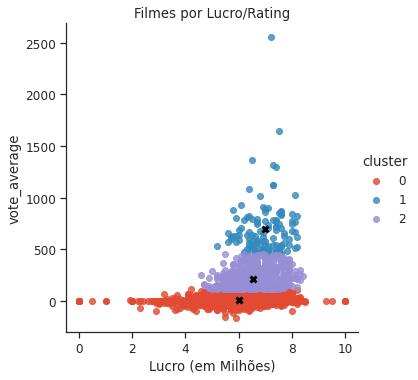

In [57]:
Xx = df.loc[:, ["vote_average", "lucro"]]
n_clusters = 3
kmeans = KMeans(n_clusters).fit(Xx)
y_pred = kmeans.labels_
df["cluster"] = y_pred
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plot_cluster(df, centroids,   "vote_average", "lucro" , title = "Filmes por Lucro/Rating", 
             xlabel =  "Lucro (em Milhões)", ylabel = "vote_average" )

/home/valencar/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


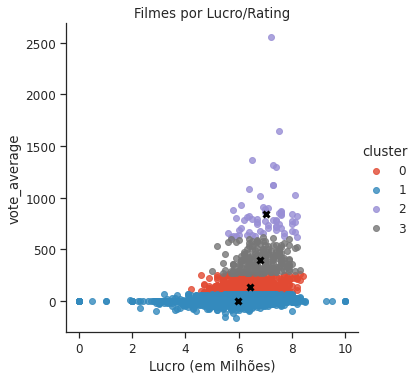

In [58]:
Xx = df.loc[:, ["vote_average", "lucro"]]
n_clusters = 4
kmeans = KMeans(n_clusters).fit(Xx)
y_pred = kmeans.labels_
df["cluster"] = y_pred
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plot_cluster(df, centroids,   "vote_average", "lucro", title = "Filmes por Lucro/Rating", 
             xlabel =  "Lucro (em Milhões)", ylabel = "vote_average" )

/home/valencar/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


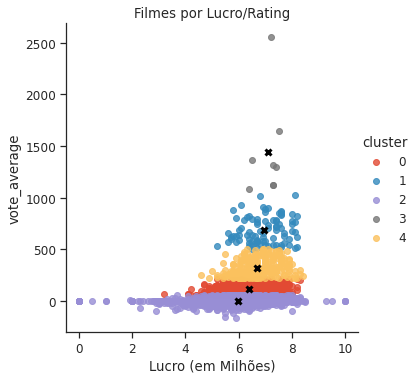

In [59]:
Xx = df.loc[:, ["vote_average", "lucro"]]
n_clusters = 5
kmeans = KMeans(n_clusters).fit(Xx)
y_pred = kmeans.labels_
df["cluster"] = y_pred
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plot_cluster(df, centroids,   "vote_average", "lucro", title = "Filmes por Lucro/Rating", 
             xlabel =  "Lucro (em Milhões)", ylabel = "vote_average" )

/home/valencar/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


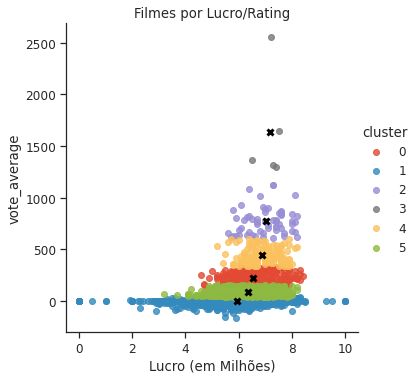

In [60]:
Xx = df.loc[:, ["vote_average", "lucro"]]
n_clusters = 6
kmeans = KMeans(n_clusters).fit(Xx)
y_pred = kmeans.labels_
df["cluster"] = y_pred
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plot_cluster(df, centroids,   "vote_average", "lucro", title = "Filmes por Lucro/Rating", 
             xlabel =  "Lucro (em Milhões)", ylabel = "vote_average" )

# Determinando o melhor número de Clusters (Elbow Method)

In [61]:
Xx = Xx
Ks = range(1, 10)
km = [KMeans(n_clusters=i) for i in Ks]
score = [km[i].fit(Xx).score(Xx) for i in range(len(km))]
print(score)

[-88782462.06841055, -32518151.504649058, -17536668.107932024, -11562230.397486812, -7864606.916123003, -5677644.072008529, -4351792.918411317, -3187486.8327613384, -2575020.842771265]


In [62]:
list(range(1,9))

[1, 2, 3, 4, 5, 6, 7, 8]

In [63]:
score

[-88782462.06841055,
 -32518151.504649058,
 -17536668.107932024,
 -11562230.397486812,
 -7864606.916123003,
 -5677644.072008529,
 -4351792.918411317,
 -3187486.8327613384,
 -2575020.842771265]

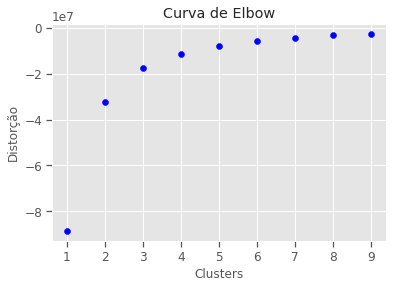

In [64]:
plt.style.use('ggplot')
plt.scatter( list(range(1,len(score)+1)), score, c="b")
plt.title("Curva de Elbow")
plt.xlabel("Clusters")
plt.ylabel("Distorção")
plt.show()

Exercício: Variar o número de clusters (k=7)